In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)


In [4]:
CSV_PATH = "StudentPerformanceFactors.csv"  
df = pd.read_csv(CSV_PATH)
print(df.shape)
df.head()


(6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
df.info()
df.describe()

print("Duplicates:", df.duplicated().sum())

df.columns = [c.strip() for c in df.columns]

TARGET = "Exam_Score"
assert TARGET in df.columns, "Exam_Score column not found!"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

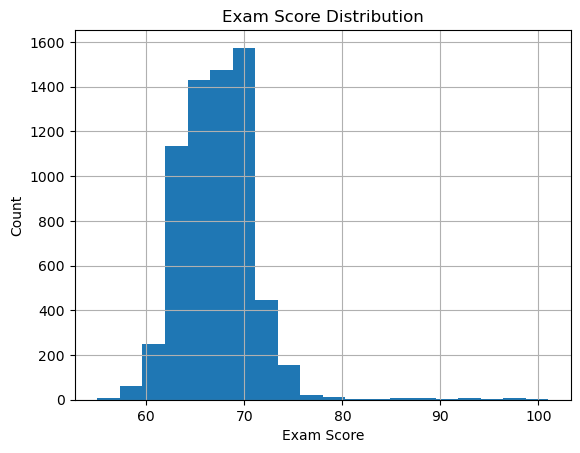

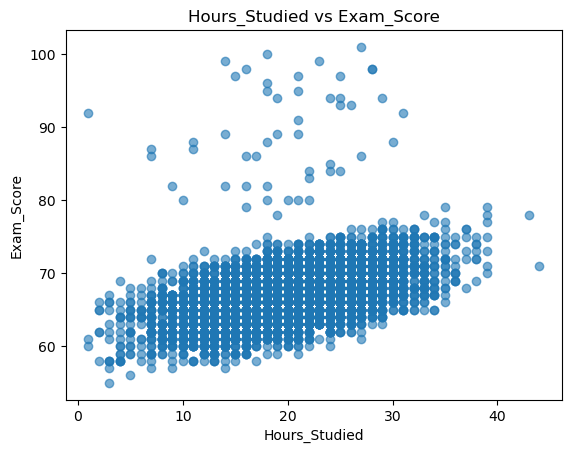

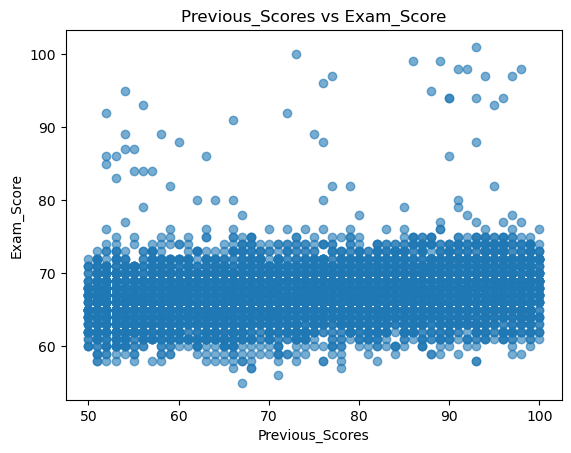

In [6]:
# Histogram for target
plt.figure()
df[TARGET].hist(bins=20)
plt.title("Exam Score Distribution")
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.show()

# Scatter: Study Hours vs Exam Score
plt.figure()
plt.scatter(df["Hours_Studied"], df[TARGET], alpha=0.6)
plt.title("Hours_Studied vs Exam_Score")
plt.xlabel("Hours_Studied")
plt.ylabel("Exam_Score")
plt.show()

# Scatter: Previous Scores vs Exam Score
plt.figure()
plt.scatter(df["Previous_Scores"], df[TARGET], alpha=0.6)
plt.title("Previous_Scores vs Exam_Score")
plt.xlabel("Previous_Scores")
plt.ylabel("Exam_Score")
plt.show()


In [7]:
X = df.drop(columns=[TARGET])
y = df[TARGET]

numeric_features = [
    "Hours_Studied","Attendance","Access_to_Resources","Sleep_Hours",
    "Previous_Scores","Motivation_Level","Tutoring_Sessions","Family_Income",
    "Teacher_Quality","Peer_Influence","Physical_Activity","Distance_from_Home"
]

categorical_features = [
    "Parental_Involvement","Extracurricular_Activities","Internet_Access",
    "School_Type","Learning_Disabilities","Parental_Education_Level","Gender"
]

# Keep only columns that exist (in case your data changed)
numeric_features = [c for c in numeric_features if c in X.columns]
categorical_features = [c for c in categorical_features if c in X.columns]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape


((5285, 19), (1322, 19))

In [17]:
numeric_features = [
    "Hours_Studied","Attendance","Sleep_Hours",
    "Previous_Scores","Tutoring_Sessions",
    "Physical_Activity"
]

categorical_features = [
    "Access_to_Resources","Motivation_Level","Family_Income",
    "Teacher_Quality","Peer_Influence",
    "Parental_Involvement","Extracurricular_Activities","Internet_Access",
    "School_Type","Learning_Disabilities","Parental_Education_Level",
    "Gender","Distance_from_Home"   # <-- moved here
]



In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Helper function for evaluation
def evaluate(y_true, y_pred, label="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)   # <-- manual square root
    r2 = r2_score(y_true, y_pred)
    print(f"{label} -> MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

# Fit model
linreg_model.fit(X_train, y_train)

# Predictions
y_pred_train = linreg_model.predict(X_train)
y_pred_test  = linreg_model.predict(X_test)

# Evaluation
print("=== Linear Regression Performance ===")
evaluate(y_train, y_pred_train, label="Train")
evaluate(y_test,  y_pred_test,  label="Test")


=== Linear Regression Performance ===
Train -> MSE: 4.3480, RMSE: 2.0852, R²: 0.7173
Test -> MSE: 3.2560, RMSE: 1.8044, R²: 0.7696


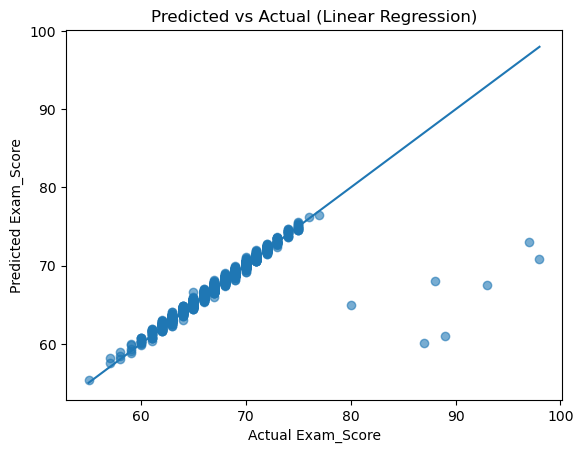

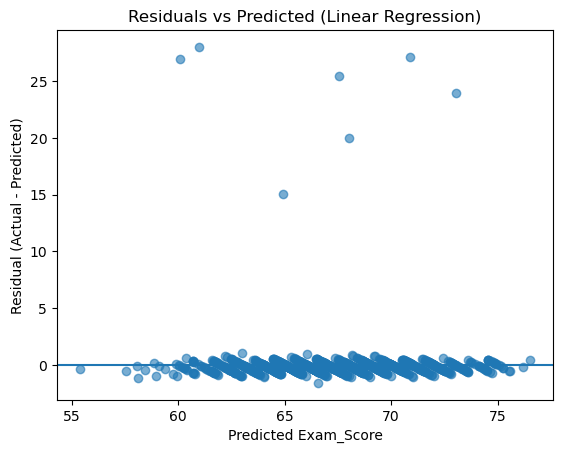

In [21]:
# Predictions vs Actual for Test set
plt.figure()
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.title("Predicted vs Actual (Linear Regression)")
plt.xlabel("Actual Exam_Score")
plt.ylabel("Predicted Exam_Score")
# Reference line
lims = [min(y_test.min(), y_pred_test.min()), max(y_test.max(), y_pred_test.max())]
plt.plot(lims, lims)
plt.show()

# Residuals plot
residuals = y_test - y_pred_test
plt.figure()
plt.scatter(y_pred_test, residuals, alpha=0.6)
plt.axhline(0)
plt.title("Residuals vs Predicted (Linear Regression)")
plt.xlabel("Predicted Exam_Score")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()


In [22]:
cv_scores = cross_val_score(linreg_model, X, y, cv=5, scoring="r2")
print("5-fold CV R^2 scores:", cv_scores)
print("Mean R^2:", cv_scores.mean())


5-fold CV R^2 scores: [0.62563917 0.72342061 0.7082529  0.73305957 0.84044023]
Mean R^2: 0.7261624968764575


=== Polynomial (degree=2, Ridge) Performance ===
Test -> MSE: 3.2551, RMSE: 1.8042, R²: 0.7697


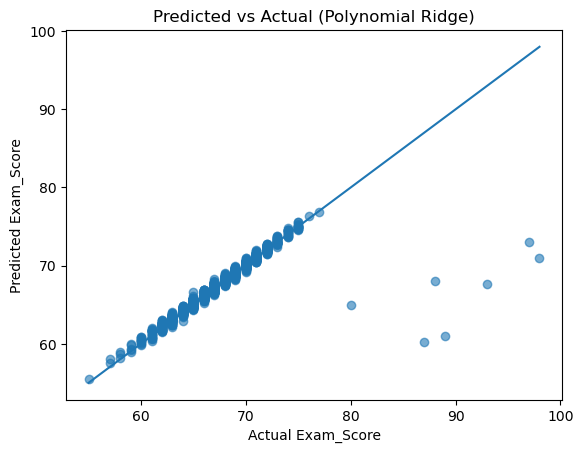

In [23]:
poly_numeric_features = ["Hours_Studied","Previous_Scores","Motivation_Level"]
poly_numeric_features = [c for c in poly_numeric_features if c in numeric_features]

poly_preprocessor = ColumnTransformer(
    transformers=[
        ("poly_num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("poly", PolynomialFeatures(degree=2, include_bias=False)),
            ("scaler", StandardScaler())
        ]), poly_numeric_features),
        ("other_num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), list(set(numeric_features) - set(poly_numeric_features))),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop"
)

poly_model = Pipeline(steps=[
    ("preprocess", poly_preprocessor),
    ("regressor", Ridge(alpha=1.0))
])

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

print("=== Polynomial (degree=2, Ridge) Performance ===")
evaluate(y_test, y_pred_poly, label="Test")

# Compare visually
plt.figure()
plt.scatter(y_test, y_pred_poly, alpha=0.6)
plt.title("Predicted vs Actual (Polynomial Ridge)")
plt.xlabel("Actual Exam_Score")
plt.ylabel("Predicted Exam_Score")
lims = [min(y_test.min(), y_pred_poly.min()), max(y_test.max(), y_pred_poly.max())]
plt.plot(lims, lims)
plt.show()


In [24]:
def train_evaluate_with_features(numeric_keep=None, categorical_keep=None, model=None, title=""):
    if numeric_keep is None:
        numeric_keep = numeric_features
    if categorical_keep is None:
        categorical_keep = categorical_features
    if model is None:
        model = LinearRegression()

    pipe = Pipeline(steps=[
        ("preprocess", ColumnTransformer(
            transformers=[
                ("num", Pipeline(steps=[
                    ("imputer", SimpleImputer(strategy="median")),
                    ("scaler", StandardScaler())
                ]), numeric_keep),
                ("cat", categorical_transformer, categorical_keep),
            ],
            remainder="drop"
        )),
        ("regressor", model)
    ])

    pipe.fit(X_train[numeric_keep + categorical_keep], y_train)
    y_pred = pipe.predict(X_test[numeric_keep + categorical_keep])
    print(f"=== {title} ===")
    evaluate(y_test, y_pred, label="Test")
    return pipe

# Example 1: Only top intuitively important features
top_num = [c for c in ["Hours_Studied","Previous_Scores","Motivation_Level","Attendance","Sleep_Hours"] if c in numeric_features]
top_cat = [c for c in ["Parental_Involvement","Internet_Access","Gender","School_Type"] if c in categorical_features]
pipe_top = train_evaluate_with_features(top_num, top_cat, LinearRegression(), title="Top Feature Subset (Linear)")

# Example 2: Add polynomial on top subset
poly_top = Pipeline(steps=[
    ("preprocess", ColumnTransformer(
        transformers=[
            ("poly_num", Pipeline(steps=[
                ("imputer", SimpleImputer(strategy="median")),
                ("poly", PolynomialFeatures(degree=2, include_bias=False)),
                ("scaler", StandardScaler())
            ]), top_num),
            ("cat", categorical_transformer, top_cat),
        ],
        remainder="drop"
    )),
    ("regressor", Ridge(alpha=1.0))
])

poly_top.fit(X_train[top_num + top_cat], y_train)
y_pred_poly_top = poly_top.predict(X_test[top_num + top_cat])
print("=== Top Feature Subset (Polynomial Ridge) ===")
evaluate(y_test, y_pred_poly_top, label="Test")


=== Top Feature Subset (Linear) ===
Test -> MSE: 4.9159, RMSE: 2.2172, R²: 0.6522
=== Top Feature Subset (Polynomial Ridge) ===
Test -> MSE: 4.9290, RMSE: 2.2201, R²: 0.6513


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

# Preprocessing for numeric & categorical
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), numeric_features),

        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_features)
    ]
)

# Clustering pipeline
clust_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("kmeans", KMeans(n_clusters=3, random_state=42, n_init=10))
])

# Fit & predict clusters
X_cluster = df[numeric_features + categorical_features]
clusters = clust_pipe.fit_predict(X_cluster)
df["Cluster"] = clusters

# Inspect cluster-wise averages
df.groupby("Cluster")[numeric_features + [TARGET]].mean()


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Cluster,,,,,,,
0,20.410376,69.765002,7.101045,76.770809,0.944638,2.974835,65.168022
1,19.064578,80.017263,6.905371,72.917519,3.147059,3.218031,67.785806
2,20.097561,90.675203,7.032114,74.654065,1.019106,2.800813,69.056911
